<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Model Tuning</center></font></h1>
<h1><center>Job Change Prediction - Week 1 </center></h1>

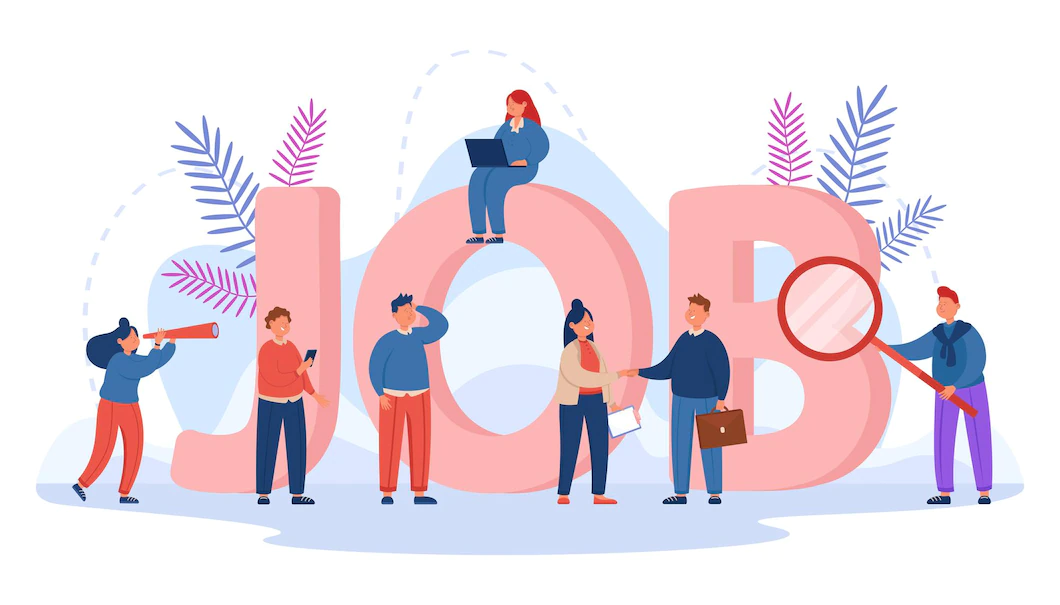

<b><h2><center>Job Change Prediction</center></h2></b>

## Problem Statement

### Businees Context

The Ed Tech companies working on data science usually receive many
registrations for the training programs of the companies before officially
giving them a permanent role. Among those trainees, the companies want
to know which candidates are really want to work for them or will look
for a new employment after training time. This will help to reduce the
training cost, and bring higher levels of satisfaction and retention. This
work is performed to interpret the main factors impacting to candidate
decision and then build a prediction model to predict the probability of a
candidate will look for a new job or will work for the company using the
current credentials, demographics, experience data, etc.

### Objective
Ed Tech company wants to predict the likelihood of the candidates with
the intention to leave or do not leave the company after training periods. As data scientist at this Ed Tech company,you need to work on these and interpret the main factors impacting to candidate decision
and then build a prediction model to predict the probability of a candidate will
look for a new job or will work for the company using the current credentials,
demographics, experience data, etc.


### Data Description

* enrollee_id: Unique ID for the candidate

* city: City code

* city_ development _index: Development index of the city (scaled)

* gender: Gender of the candidate

* relevent_experience: Relevant experience of the candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline: Education major discipline of the candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type: Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for a job change, 1 – Looking for a job change


#### What is City Development Index?

* The City Development Index was developed for the Second United Nations Conference on Human Settlements (Habitat II) in 1996 and measures the level of development in cities. The Urban Indicators Programme of the United Nations Human Settlements Programme (UN-Habitat) developed the indicator so that they could rank cities of the world according to their level of development and as a display of indicators depicting development. The CDI cuts across the different clusters identified in the Urban Indicator Framework as it is based on five sub-indices namely, infrastructure, waste, health, education, and city product. It is useful as it provides a snap-shot view of how cities are doing concerning the different indices

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [ ]:
df = pd.read_csv("jobs_data.csv")

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Checking the shape of the dataset


In [ ]:
# Checking the number of rows and columns in the data
df.shape

(19158, 14)

* The dataset contains information (14 attributes) about 19158 rows


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

* Only 5 variables are numerical rest all are object types.
* 8 columns have less than 19158 non-null values i.e. columns have missing values.

### Statistical summary of the dataset

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,NaN,NaN,NaN,16875.358179,9616.292592,1.0,8554.25,16982.5,25169.75,33380.0
city,19158,123,city_103,4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,19158.0,NaN,NaN,NaN,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
gender,14650,3,Male,13221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,19158,2,Has relevent experience,13792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18772,3,no_enrollment,13817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18698,5,Graduate,11598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,16345,6,STEM,14492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,19093,22,>20,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,13220,8,50-99,3083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
* `city_developement_index:` Since the value of the city development index is normalized a 0.82 average value indicates that most of the data we have is from fairly developed cities (metropolitan cities). However, the range of the index is large and varies from 0.448 to 0.949.
* `training_hours:` Training hours have a wide range from 60hrs to 336hrs. On average, an enrollee has 65hrs of training. 755 of the enrollees less than (or equal to) 88hrs of training.
* `target:` 75% of the enrollees in data are not looking for a job and maybe they just signed up to get trained in new technologies

In [ ]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


**Observations**
* Most of the records are from city_103.
* Most of the enrollees are Males.
* Most enrollees have some relevant experience.
* Most of the enrollees were not enrolled in a university.
* Most of the enrollees are graduates.
* Most of the enrollees have STEM as their major discipline.
* Most enrollees have worked in a pvt_ltd company.

In [ ]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: enrollee_id, Length: 19158, dtype: int64
--------------------------------------------------
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
--------------------------------------------------
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64
--------------------------------------------------
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
--------------------------------------------------
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
-------------

### Checking for duplicate values



In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    23.53
relevent_experience        0.00
enrolled_university        2.01
education_level            2.40
major_discipline          14.68
experience                 0.34
company_size              30.99
company_type              32.05
last_new_job               2.21
training_hours             0.00
target                     0.00
dtype: float64

* `company_type` column has 32.05% missing values out of the total observations.
* `company_size` column has 30.99% missing values out of the total observations.
* `gender` column has 23.53% missing values out of the total observations.
* `major_discipline` column has 14.68% missing values out of the total observations.
* `education_level` column has 2.40% missing values out of the total observations.
* `last_new_job` column has 2.21% missing values out of the total observations.
* `enrolled_university` column has 2.01% missing values out of the total observations.
* `experience` column has 0.34% missing values out of the total observations.
* We will impute these values after we split the data into train, validation and test sets.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

#### `city_development_index`

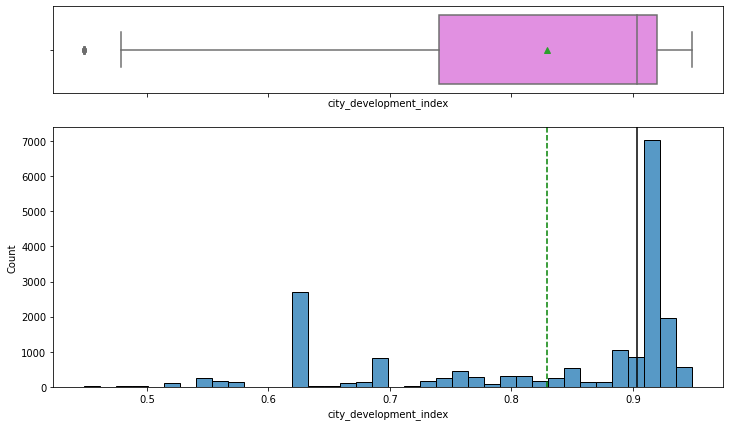

In [ ]:
histogram_boxplot(df, "city_development_index")

* Distribution of city_development_index is left-skewed.
* Cities with city_development_index less than ~0.45 are outliers - such cities might be underdeveloped or tier 3 cities.
* Let's explore it further.

In [ ]:
df[df["city_development_index"] < 0.45]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,8238,city_33,0.448,NaN,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.0
4744,30985,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,43,1.0
5010,27970,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,NaN,NaN,never,73,1.0
5265,31194,city_33,0.448,NaN,No relevent experience,NaN,High School,NaN,5,NaN,Pvt Ltd,never,86,1.0
5567,598,city_33,0.448,NaN,Has relevent experience,Part time course,Masters,STEM,6,NaN,NaN,1,18,1.0
6127,18564,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,Public Sector,4,32,1.0
7724,31179,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.0
7864,26838,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,NaN,NaN,>4,74,0.0
9134,4858,city_33,0.448,NaN,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.0
10401,19463,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.0


* All such records with a city development index less than 0.45 are from city_33, hence they seem to represent true pattern and we don't need to treat them as outliers.

#### `training_hours`

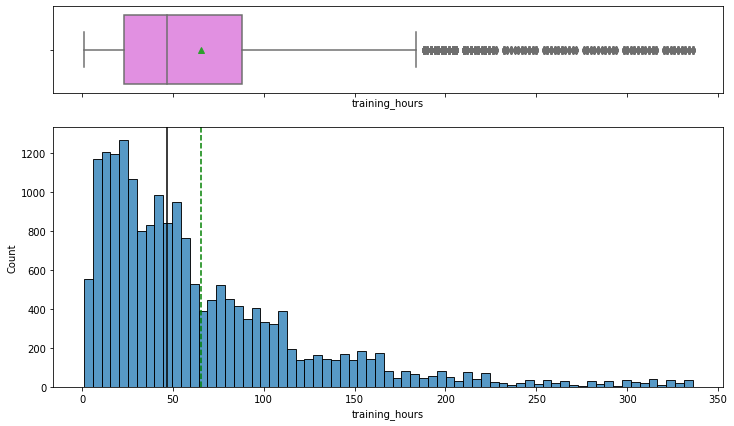

In [ ]:
histogram_boxplot(df, "training_hours")

* Distribution of training_hours is right-skewed with many outliers.
* From the boxplot, we can see that enrollees with more than ~175hrs of training are outliers.

#### `gender`

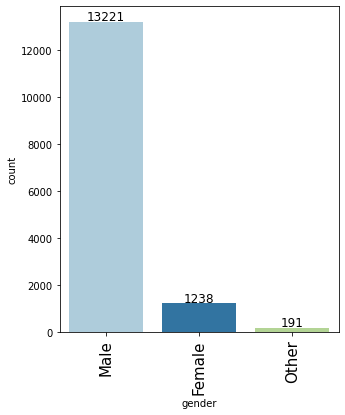

In [ ]:
labeled_barplot(df, "gender")

* 69% of the enrollees are males.

#### `relevent_experience`

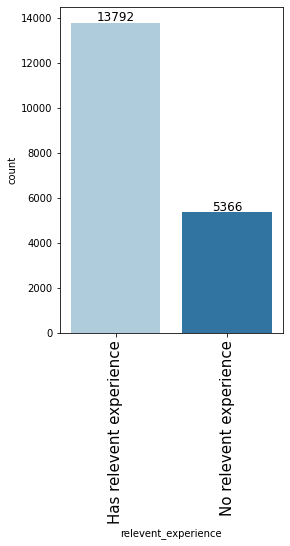

In [ ]:
labeled_barplot(df, "relevent_experience")

* 72% of the enrollees have some relevant experience.

#### `company_size`

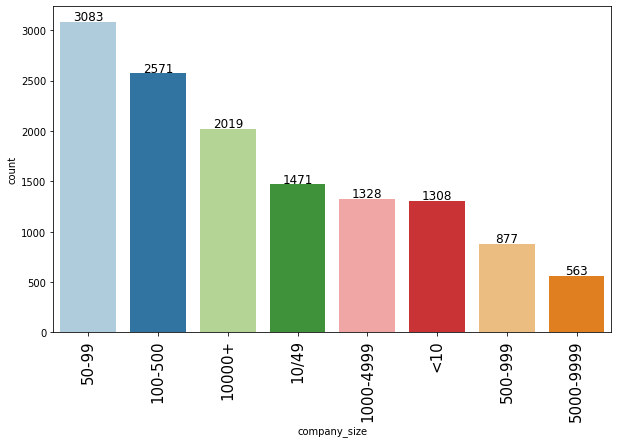

In [ ]:
labeled_barplot(df, "company_size")

* 16.1% of the enrollees have worked in a company with 50-99 employees, followed by 13.4% of the enrollees who have worked in a company with 100-500.

### Bivariate Analysis

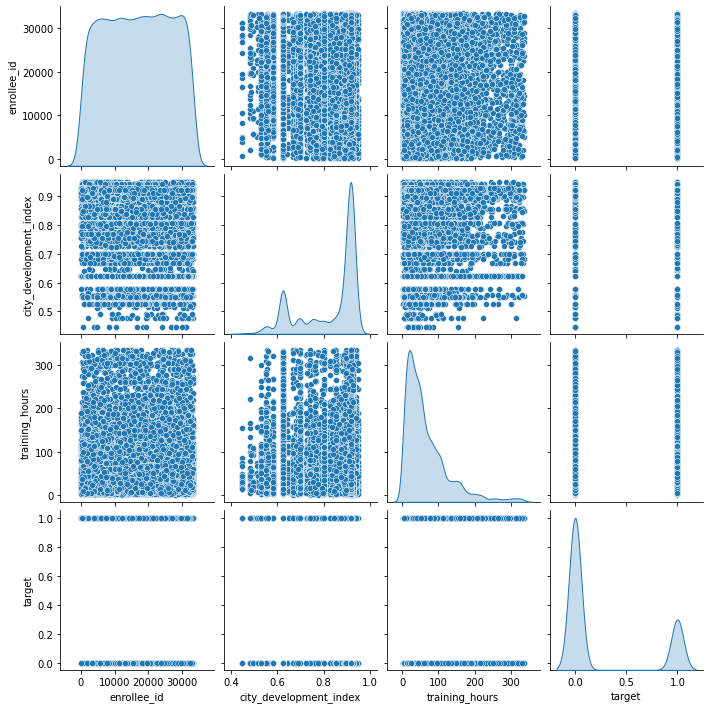

In [ ]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

* Encoding 1 and 0 to 'yes' and 'no' respectively, for analysis.

In [ ]:
df["target"].replace(1, "yes", inplace=True)
df["target"].replace(0, "no", inplace=True)

#### `target vs gender`

target     no   yes    All
gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


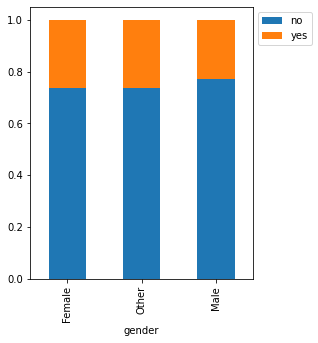

In [ ]:
stacked_barplot(df, "gender", "target")

* Females followed by other gender enrollees are the ones actively looking for a job change.
* Let's add the unknown as a category (in place of missing values) and see if there's a change in observations.

In [ ]:
df["gender"] = df["gender"].replace(np.nan, "unknown")

target      no   yes    All
gender                     
All      14381  4777  19158
Male     10209  3012  13221
unknown   3119  1389   4508
Female     912   326   1238
Other      141    50    191
------------------------------------------------------------------------------------------------------------------------


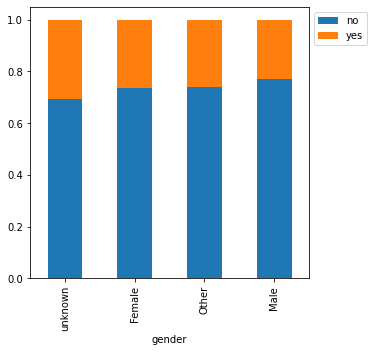

In [ ]:
stacked_barplot(df, "gender", "target")

* 'Unknown' gender has the most percentage of enrollees looking for a job change.

#### `target vs relevant_experience`

target                      no   yes    All
relevent_experience                        
All                      14381  4777  19158
Has relevent experience  10831  2961  13792
No relevent experience    3550  1816   5366
------------------------------------------------------------------------------------------------------------------------


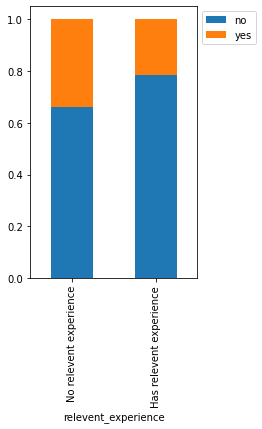

In [ ]:
stacked_barplot(df, "relevent_experience", "target")

* 35% of the enrollees who do not have relevant experience are the ones looking for a job change.
* Such enrollees might be freshers looking for opportunities.
* 20% of the enrollees who have relevant experience are also looking for a job change such enrollees after upskilling might be looking for new roles with the newly acquired skills.

#### `target vs company_type`

target                  no   yes    All
company_type                           
All                  10625  2393  13018
Pvt Ltd               8042  1775   9817
Public Sector          745   210    955
Early Stage Startup    461   142    603
Funded Startup         861   140   1001
NGO                    424    97    521
Other                   92    29    121
------------------------------------------------------------------------------------------------------------------------


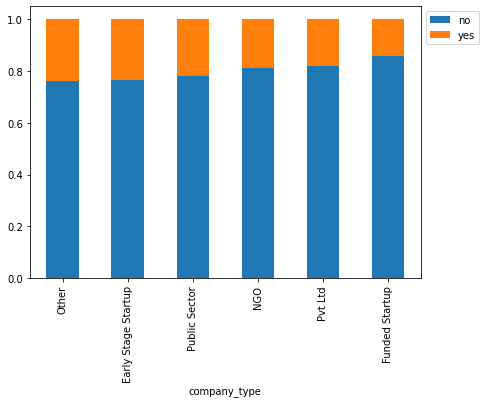

In [ ]:
stacked_barplot(df, "company_type", "target")

* Enrollees from funded startups are the ones with less interest a possible reason being their startup just got funded, and they are looking for growth there and just want to upskill by undergoing the training.
* Across all types of companies/sectors ~20% of the enrollees are looking for a job change.

#### `target vs last_new_job`

target           no   yes    All
last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


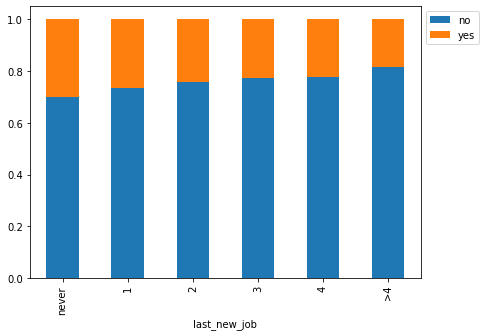

In [ ]:
stacked_barplot(df, "last_new_job", "target")

* Our earlier thought of 'never' representing freshers or those who are not working right now seems true as they are the ones most interested in a job change(looking for a start).

#### `target vs training_hours`

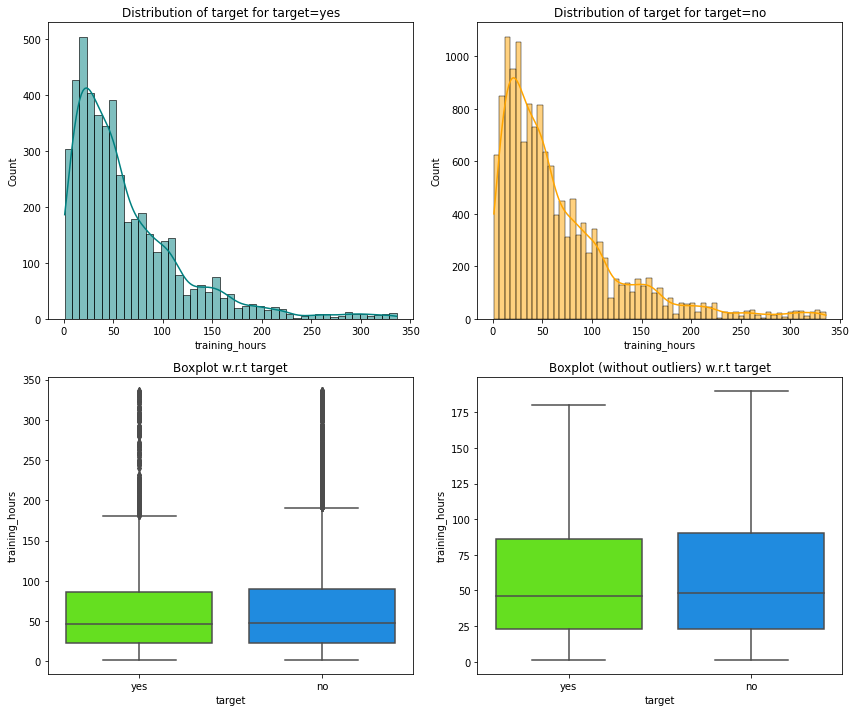

In [ ]:
distribution_plot_wrt_target(df, "training_hours", "target")

* Training hours don't seem to have any impact on the target variable.

#### `target vs city_development_index`

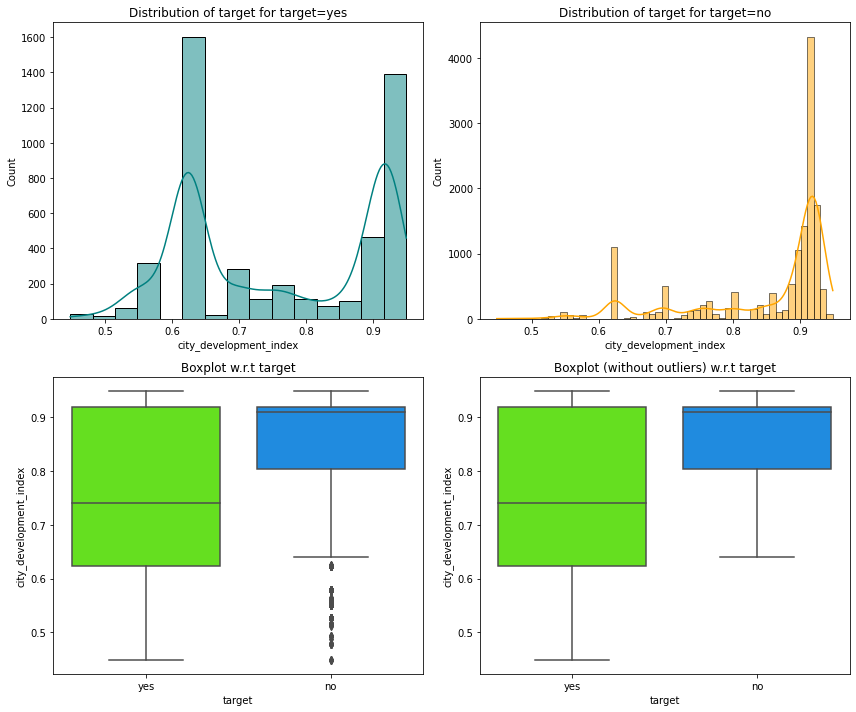

In [ ]:
distribution_plot_wrt_target(df, "city_development_index", "target")

* There's a stark difference between the enrollees looking for a job and an enrollee not looking for a job.
* Enrollee from a city with a higher development index would be less likely to look for a change in a job as compared to the enrollee coming from a city with a lower development index.
* Enrollees coming from cities with a low development index might be looking for better opportunities in metropolitan cities by upskilling themselves after undergoing the training.

## Data Preprocessing

* `enrollee_id:` enrollee_id being a unique identifier doesn't add any meaning to the analysis and can be dropped.

In [ ]:
# enrollee_id is unique for each candidate and might not add value to modeling
df.drop(["enrollee_id"], axis=1, inplace=True)

### Encoding categorical variables

In [ ]:
df["city"].nunique()

123

* There are 123 unique cities in data, we can reduce the levels by grouping them into 3 major categories:
  * Developed city - with city development index greater than 0.90
  * Developing city - with city development index between 0.74 and 0.90
  * Under-Developed city - with city development index between 0.4 and 0.74

In [ ]:
df["city_development_index"].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [ ]:
# Discretize variable into equal-sized buckets based on quantiles
df["city"] = pd.qcut(
    df["city_development_index"],
    q=[0, 0.25, 0.5, 1],
    labels=["Under_Developed", "Developing", "Developed"],
)

In [ ]:
df["city"].value_counts()

Developed          9561
Under_Developed    4838
Developing         4759
Name: city, dtype: int64

* 123 unique values have been binned into 3 categories.

In [ ]:
data1 = df.copy()

In [ ]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
gender = {"Male": 0, "Female": 1, "Other": 2}
data1["gender"] = data1["gender"].map(gender)

enrolled_university = {"no_enrollment": 0, "Full time course": 1, "Part time course": 2}
data1["enrolled_university"] = data1["enrolled_university"].map(enrolled_university)

education_level = {
    "Graduate": 0,
    "Masters": 1,
    "High School": 2,
    "Phd": 3,
    "Primary School": 4,
}
data1["education_level"] = data1["education_level"].map(education_level)

major_discipline = {
    "STEM": 0,
    "Business Degree": 1,
    "Arts": 2,
    "Humanities": 3,
    "No Major": 4,
    "Other": 5,
}
data1["major_discipline"] = data1["major_discipline"].map(major_discipline)

experience = {
    "<1": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "11": 11,
    "12": 12,
    "13": 13,
    "14": 14,
    "15": 15,
    "16": 16,
    "17": 17,
    "18": 18,
    "19": 19,
    "20": 20,
    ">20": 21,
}
data1["experience"] = data1["experience"].map(experience)

company_type = {
    "Pvt Ltd": 0,
    "Funded Startup": 1,
    "Early Stage Startup": 2,
    "Other": 3,
    "Public Sector": 4,
    "NGO": 5,
}
data1["company_type"] = data1["company_type"].map(company_type)

company_size = {
    "<10": 0,
    "10/49": 1,
    "100-500": 2,
    "1000-4999": 3,
    "10000+": 4,
    "50-99": 5,
    "500-999": 6,
    "5000-9999": 7,
}
data1["company_size"] = data1["company_size"].map(company_size)

last_new_job = {"never": 0, "1": 1, "2": 2, "3": 3, "4": 4, ">4": 5}
data1["last_new_job"] = data1["last_new_job"].map(last_new_job)

In [ ]:
data1.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Developed,0.920,0.0,Has relevent experience,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,yes
1,Developing,0.776,0.0,No relevent experience,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,no
2,Under_Developed,0.624,NaN,No relevent experience,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,no
3,Developing,0.789,NaN,No relevent experience,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,yes
4,Developing,0.767,0.0,Has relevent experience,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,no


* Values have been encoded.

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### Data Preparation for Modeling

In [ ]:
X = data1.drop(["target"], axis=1)
y = data1["target"].apply(lambda x: 1 if x == "yes" else 0)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(11494, 12) (3832, 12) (3832, 12)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 11494
Number of rows in validation data = 3832
Number of rows in test data = 3832


### Missing Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.


**The values obtained might not be integer always which is not be the best way to impute categorical values**
- To take care of that we will round off the obtained values to nearest integer value

In [ ]:
df.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "gender",
    "enrolled_university",
    "education_level",
    "major_discipline",
    "experience",
    "company_size",
    "company_type",
    "last_new_job",
]

In [ ]:
df[reqd_col_for_impute].head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,unknown,Full time course,Graduate,STEM,5,NaN,NaN,never
3,unknown,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


In [ ]:
# defining the KNN imputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64
------------------------------
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64
------------------------------
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size    

* All missing values have been treated.
* Let's inverse map the encoded values.

### Reverse Mapping for Encoded Variables

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(gender, "gender")
inverse_mapping(enrolled_university, "enrolled_university")
inverse_mapping(education_level, "education_level")
inverse_mapping(major_discipline, "major_discipline")
inverse_mapping(experience, "experience")
inverse_mapping(company_size, "company_size")
inverse_mapping(company_type, "company_type")
inverse_mapping(last_new_job, "last_new_job")

* Checking inverse mapped values/categories.

#### `Train Dataset`

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Developed          5725
Developing         2896
Under_Developed    2873
Name: city, dtype: int64
******************************
Male      10545
Female      835
Other       114
Name: gender, dtype: int64
******************************
Has relevent experience    8274
No relevent experience     3220
Name: relevent_experience, dtype: int64
******************************
no_enrollment       8445
Full time course    2340
Part time course     709
Name: enrolled_university, dtype: int64
******************************
Graduate          7060
Masters           2761
High School       1245
Phd                245
Primary School     183
Name: education_level, dtype: int64
******************************
STEM               9805
Business Degree     706
Humanities          391
Arts                248
Other               220
No Major            124
Name: major_discipline, dtype: int64
******************************
>20    1977
4       846
5       838
3       811
6       744
2       679
7       627
9      

#### `Validation Dataset`

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Developed          1945
Under_Developed     979
Developing          908
Name: city, dtype: int64
******************************
Male      3540
Female     253
Other       39
Name: gender, dtype: int64
******************************
Has relevent experience    2784
No relevent experience     1048
Name: relevent_experience, dtype: int64
******************************
no_enrollment       2787
Full time course     800
Part time course     245
Name: enrolled_university, dtype: int64
******************************
Graduate          2336
Masters            929
High School        423
Phd                 88
Primary School      56
Name: education_level, dtype: int64
******************************
STEM               3261
Business Degree     225
Humanities          136
Arts                 93
Other                68
No Major             49
Name: major_discipline, dtype: int64
******************************
>20    684
5      306
3      272
4      268
6      242
2      214
7      205
10     204
9     

#### `Test Dataset`

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

Developed          1891
Under_Developed     986
Developing          955
Name: city, dtype: int64
******************************
Male      3478
Female     316
Other       38
Name: gender, dtype: int64
******************************
Has relevent experience    2734
No relevent experience     1098
Name: relevent_experience, dtype: int64
******************************
no_enrollment       2809
Full time course     779
Part time course     244
Name: enrolled_university, dtype: int64
******************************
Graduate          2329
Masters            920
High School        423
Phd                 91
Primary School      69
Name: education_level, dtype: int64
******************************
STEM               3206
Business Degree     229
Humanities          158
Arts                 96
Other                93
No Major             50
Name: major_discipline, dtype: int64
******************************
>20    625
4      292
5      290
3      278
6      239
2      236
9      214
10     200
7     

* Inverse mapping returned original labels.

### Creating Dummy Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(11494, 56) (3832, 56) (3832, 56)


* After encoding there are 56 columns.

##Model Building

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting an enrollee is looking for a job change but in reality, the enrollee is not looking for a change - Loss of resources
2. Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change  - Loss of opportunity

#### Which case is more important? 
* Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change i.e. losing on a potential candidate as the candidate will not be targeted by the HR team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model building with original data

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76466,0.260991,0.5603,0.356106


In [ ]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.758612,0.264644,0.532632,0.353599


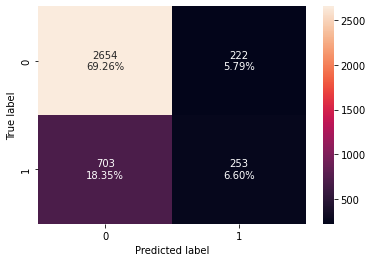

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [ ]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
cv_result_bfr

array([0.22687609, 0.28795812, 0.21291449, 0.27874564, 0.27225131])

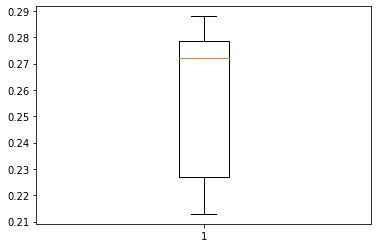

In [ ]:
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set using the cross-validation varies between ~0.21 to ~0.29 recall


### Model Building with oversampled data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2866
Before Oversampling, counts of label 'No': 8628 

After Oversampling, counts of label 'Yes': 8628
After Oversampling, counts of label 'No': 8628 

After Oversampling, the shape of train_X: (17256, 56)
After Oversampling, the shape of train_y: (17256,) 



In [ ]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

In [ ]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.818092,0.796013,0.832788,0.813985


In [ ]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.735125,0.436192,0.466965,0.451055


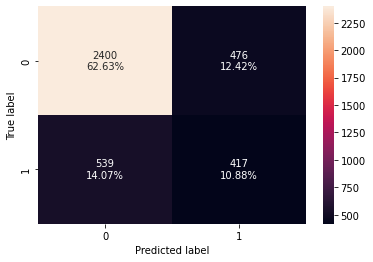

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
cv_result_over

array([0.78679027, 0.78434783, 0.79072464, 0.7995365 , 0.78041715])

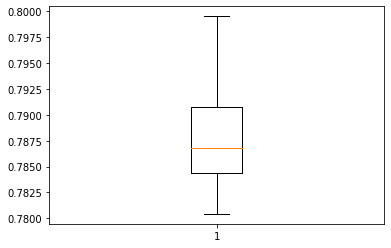

In [ ]:
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.78 to 0.79, which is an improvement from the model built on the original dataset 


* Performance on the training set improved but the model is not able to replicate the same for the validation set, which indicates that the model is overfitting
* Lets try regularization to see if overfitting can be reduced



### Regularization

In [ ]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.4, random_state=1, solver='saga')

In [ ]:
# Calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.765936,0.713723,0.796946,0.753042


In [ ]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)
print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.746608,0.535565,0.492782,0.513283


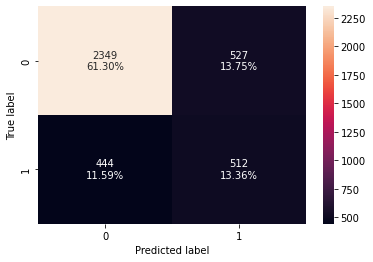

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator, X_val, y_val)

* After regularization, overfitting has reduced to some extent and the model is also performing well

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 2866
Before UnderSampling, counts of label '0': 8628 

After UnderSampling, counts of label '1': 2866
After UnderSampling, counts of label '0': 2866 

After UnderSampling, the shape of train_X: (5732, 56)
After UnderSampling, the shape of train_y: (5732,) 



In [ ]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

In [ ]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.711619,0.667481,0.732109,0.698303


In [ ]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.730689,0.671548,0.472059,0.554404


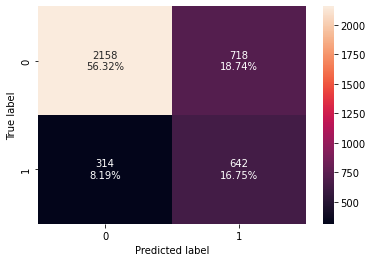

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

* Model has given a generalized performance on training and validation set

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
cv_result_under

array([0.68237347, 0.69686411, 0.60907504, 0.64048866, 0.64223386])

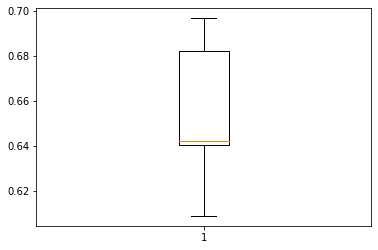

In [ ]:
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.60 to 0.69, which is an improvement from the initial model (without oversampling)

## Model Performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_reg_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.764660,0.818092,0.765936,0.711619
Recall,0.260991,0.796013,0.713723,0.667481
Precision,0.560300,0.832788,0.796946,0.732109
F1,0.356106,0.813985,0.753042,0.698303


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_reg_val_perf.T,
        log_reg_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.758612,0.735125,0.746608,0.730689
Recall,0.264644,0.436192,0.535565,0.671548
Precision,0.532632,0.466965,0.492782,0.472059
F1,0.353599,0.451055,0.513283,0.554404


* Logistic regression model on undersampled data has given a generalized performance with the highest recall on validation data, so we will consider it as our final model

**Now we have our final model, let's find out how our model is performing on unseen test data**

In [ ]:
# Calculating different metrics on validation set
log_reg_under_test_perf = model_performance_classification_sklearn(
    log_reg_under, X_test, y_test
)
print("Test performance:")
log_reg_under_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.724165,0.66911,0.463043,0.547323


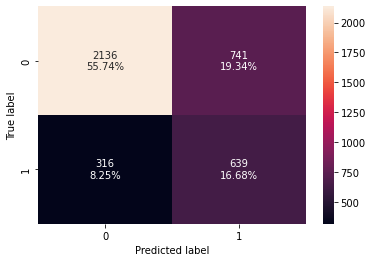

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set

### Finding the coefficients

In [ ]:
# let us check the coefficients and intercept of the model (lin. and log. reg. sklearn)

coef_df = pd.DataFrame(
    np.append(log_reg_under.coef_, log_reg_under.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,city_development_index,training_hours,city_Developing,city_Developed,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,Intercept
Coefficients,-0.609034,-0.00034,-1.557357,-1.48665,-0.105124,0.30785,0.436995,-0.462973,-0.54364,-0.852736,...,-0.490558,0.048664,-0.161627,-0.253964,-0.047549,0.147443,0.320965,0.003938,-0.231418,1.730539


### Coefficient interpretations

* Coefficient of gender_Other, relevent_experience_No relevant experience, company_type_Other, last_new_job_2, etc are positive, increase in these will lead to an increase in chances of a person looking for a job change
* Coefficient of city_development_index, training_hours, city_Developing, city_Developing, etc are negative increase in these will lead to a decrease in chances of a person not looking for a job change

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

* Odds from coefficients and Percentage change in odds

In [ ]:
# converting coefficients to odds
#odds = np.exp(log_reg_under.params)
odds = np.exp(log_reg_under.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(log_reg_under.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,city_development_index,training_hours,city_Developing,city_Developed,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
Odds,0.543876,0.999660,0.210692,0.226129,0.900212,1.360496,1.548048,0.62941,0.580631,0.426247,0.734332,0.694344,0.352175,1.355790,1.214362,1.348367,0.971521,1.188787,0.848076,1.231372,0.878657,1.099694,1.169567,1.045911,0.796661,0.881406,0.686540,0.861948,1.097492,0.943656,1.129620,1.227706,0.928339,1.01027,1.251812,0.993193,1.066996,1.625147,0.906973,1.326979,2.232715,1.391493,1.002962,0.976647,1.157864,0.790473,1.256650,0.612284,1.049868,0.850759,0.775720,0.953564,1.158867,1.378457,1.003946,0.793407
Change_odd%,-45.612424,-0.034043,-78.930790,-77.387107,-9.978753,36.049623,54.804827,-37.05901,-41.936929,-57.375267,-26.566786,-30.565641,-64.782543,35.579036,21.436185,34.836714,-2.847858,18.878665,-15.192402,23.137168,-12.134257,9.969434,16.956706,4.591126,-20.333861,-11.859400,-31.346019,-13.805239,9.749235,-5.634441,12.961961,22.770648,-7.166071,1.02702,25.181176,-0.680688,6.699588,62.514729,-9.302730,32.697945,123.271491,39.149269,0.296199,-2.335320,15.786359,-20.952731,25.664994,-38.771553,4.986779,-14.924123,-22.428031,-4.643629,15.886697,37.845716,0.394600,-20.659251


### Coefficient interpretations


* `city_developement_index`: Holding all other features constant a 1 unit change in city_development_index will decrease the odds of a person looking for a job by ~0.54 times or a ~45% decrease in odds of looking for a job change

* `training_hours`: Holding all other features constant a 1 unit change in training_hours will decrease the odds of a person looking for a job by ~0.99 times or a ~0.034% decrease in odds of a person looking for a job change

* `city - developing/developed`: 
    * The odds of a person who is from a developing city looking for a job change is ~0.22 times less than a person who is from an under-developed city or a ~77% fewer odds than a person who is from an under-developed city

    * Similarly, The odds of a person who is from a developed city looking for a job change is ~0.22 times less than a person who is from an under-developed city or a ~77% fewer odds than a person who is from an under-developed city (keeping under-developed cities as a reference).

* `gender - male/other` -  The odds of a male looking for a job change is ~9.97% lower than a female. Similarly, The odds of a person from 'other' gender looking for a job change is ~36% higher than a female. (keeping females as a reference).

* `relevent_experience` - No relevant experience: The odds of a person who has no relevant job experience looking for a job change ~1.54 times higher than the person with some relevant experience or is ~54.8% higher than a person who has some relevant experience.

`Interpretation for other attributes can be made similarly.`

## Conclusions and Business Recommendations

* As we saw in our analysis and also the logistic regression model shows that several training hours have a very less impact on a person looking to change a job, so the company should not give high importance to this attribute while looking to hire a person.
* A person from an under-developed city would highly be looking for a switch and if an enrollee fulfills the criterion of job role they should be given higher preference than enrollees from other cities (developed and underdeveloped).
* To have a diverse culture in the company enrollees from other genders can be hired as they are more likely to look for a new job role.
* Enrollees with no relevant experience or no experience - generally freshers are more likely to look for a job and such enrollees on fulfilling the criterion of job should be the ones the company should focus on.
* Enrollees from early-stage startups, public sectors, or NGOs are more likely to switch to a new role as compared to the ones from the Private sector or Funded startups.
* Company size is an important aspect, those enrollees who have been in a company with a higher number of employees (1000-5000 or 10000+) are the ones who are actively looking for a switch - Such enrollees might now be looking for higher roles in team management, or it is much easier for such enrollees to fit into a workplace with so higher exposure to the working environment.

#### **Note**: The aim of this case study is to cover the concepts of Week 1 in Model Tuning course. More predictive models and hyperparameter tuning can be tried to improve the results.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### `enrolled_university`

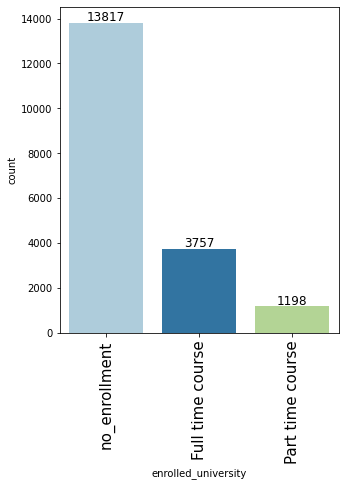

In [ ]:
labeled_barplot(df, "enrolled_university")

* 72.1% of the enrollees had no enrollment in universities followed by 19.6% of the enrollees with the full-time course.

#### `education_level`

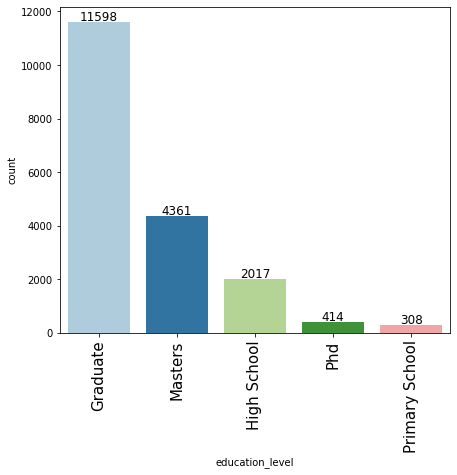

In [ ]:
labeled_barplot(df, "education_level")

* 60.5% of the enrollees are graduates, followed by 22.8% of the enrollees having Masters degree.

#### `major_discipline`

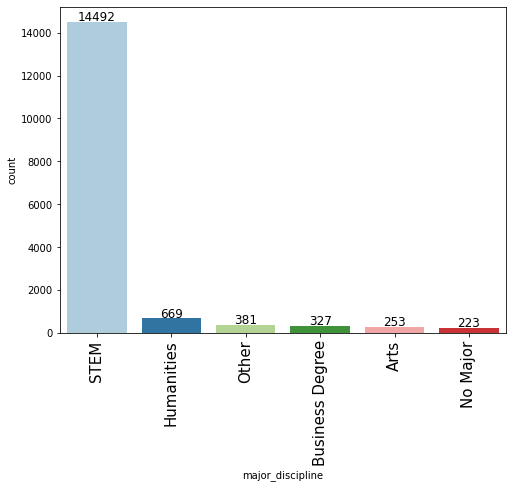

In [ ]:
labeled_barplot(df, "major_discipline")

* 75.5% of the enrollees have STEM as their major discipline. STEM includes programs in science, technology, engineering, and mathematics.

#### `company_type`

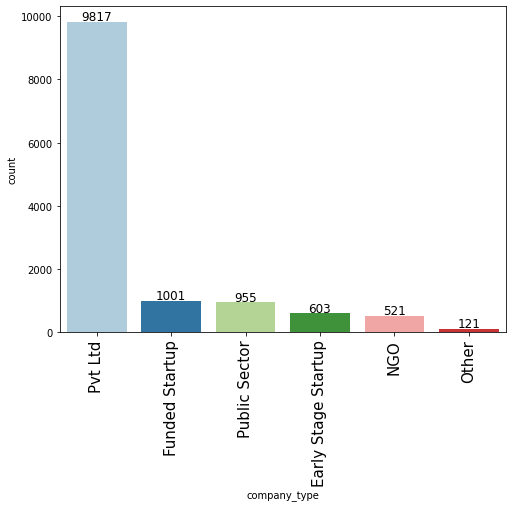

In [ ]:
labeled_barplot(df, "company_type")

* 51.2% of the enrollees have worked in private companies, followed by 8.3% enrollees in startups.

#### `last_new_job`

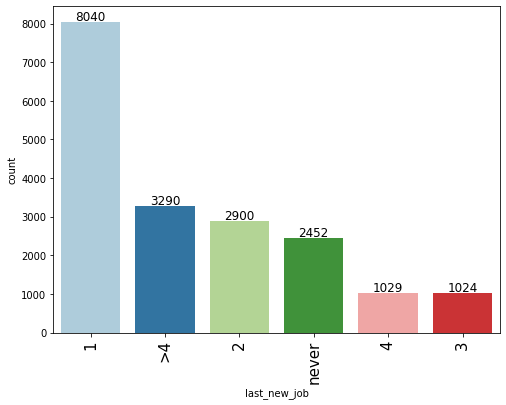

In [ ]:
labeled_barplot(df, "last_new_job")

* 42% of the enrollees have a difference of 1 year between their current and previous job followed by 17.2% of the enrollees with more than 4 years of difference.
* Never here can mean that enrollee has never worked before(freshers) or is not working right now.

### Bivariate analysis

#### Correlation Check

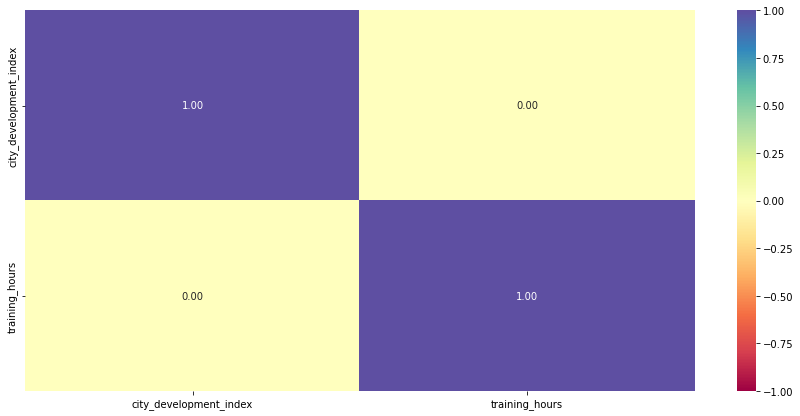

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no strong correlation either with the target or between any independent variable.
* City development index has a negative relation with the target.

#### `target vs city`

target              no   yes    All
city                               
All              14381  4777  19158
Under_Developed   2427  2411   4838
Developed         7956  1605   9561
Developing        3998   761   4759
------------------------------------------------------------------------------------------------------------------------


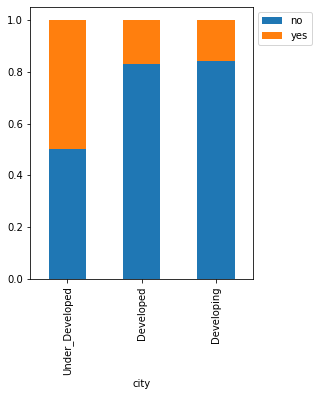

In [ ]:
stacked_barplot(df, "city", "target")


* Cities with the highest percentage of enrollees looking for a job might be from tier 2 or tier 3 cities looking for better opportunities.
* This column captures a clear difference between enrollees looking for a job and those who are not, it can act as an important predictor.

#### `target vs major_discipline`

target               no   yes    All
major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


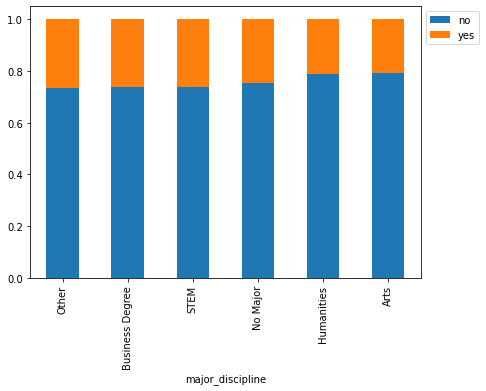

In [ ]:
stacked_barplot(df, "major_discipline", "target")

* There's a high proportion of enrollees looking for a job change across all categories.

#### `target vs experience`

target         no   yes    All
experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


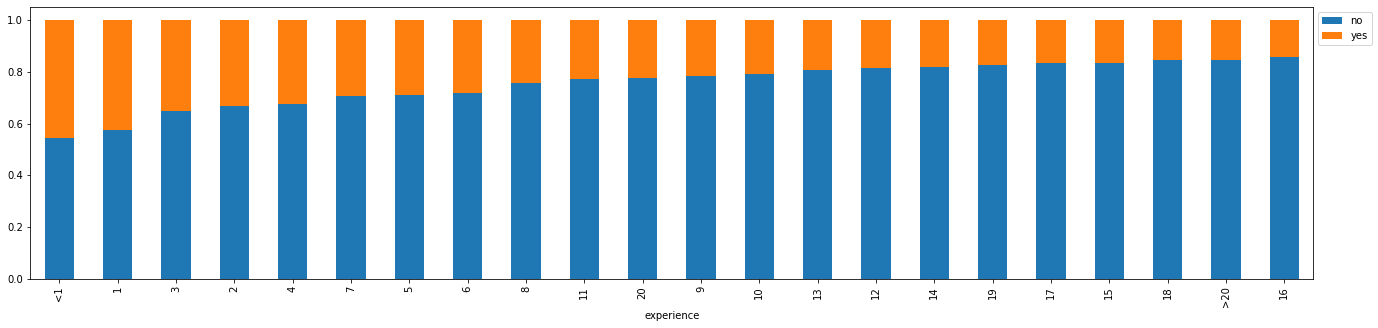

In [ ]:
stacked_barplot(df, "experience", "target")

* There's a high proportion of enrollees looking for a job change having less than 10 years of experience.
* <1 year will the freshers who after training would want to do a job in a relevant field.

#### `target vs company_size`

target           no   yes    All
company_size                    
All           10853  2367  13220
50-99          2538   545   3083
100-500        2156   415   2571
10000+         1634   385   2019
10/49          1127   344   1471
<10            1084   224   1308
1000-4999      1128   200   1328
500-999         725   152    877
5000-9999       461   102    563
------------------------------------------------------------------------------------------------------------------------


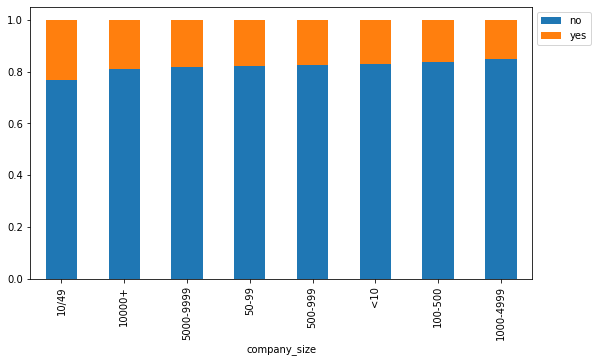

In [ ]:
stacked_barplot(df, "company_size", "target")

* ~20% of the enrollees who have been in companies of different sizes are looking for a job change.

#### `target vs enrolled_university`

target                  no   yes    All
enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


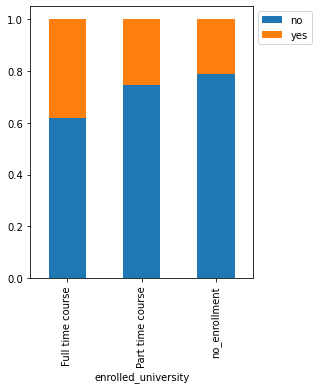

In [ ]:
stacked_barplot(df, "enrolled_university", "target")

* There's a high portion of enrollees looking for a job change across all three categories.
* ~40% of the enrollees with full-time courses are looking for a job change.
* ~30% of the enrollees with part-time courses are looking for a job change.

#### `target vs education_level`

target              no   yes    All
education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


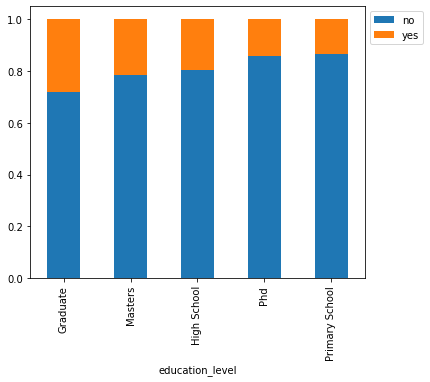

In [ ]:
stacked_barplot(df, "education_level", "target")

* There's a high proportion of enrollees looking for a job change across Graduates, Masters, and High Schooler categories.
* ~30% of the graduate enrollees are looking for a job change.
* 20% of the enrollees with a master's degree are looking for a job change.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.